In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:xlabel='Age', ylabel='Purchased'>

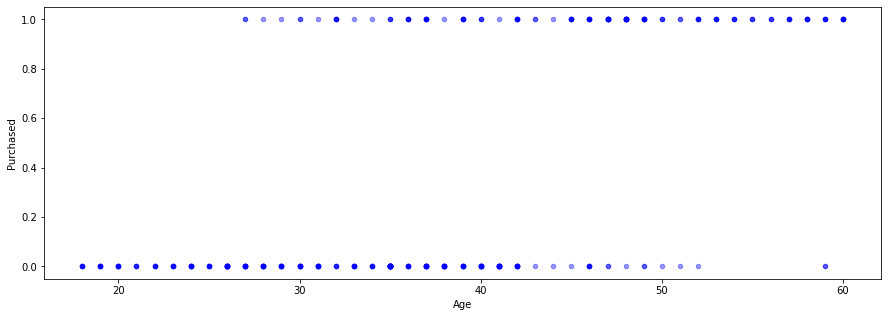

In [4]:
df.plot(kind='scatter',x='Age',y='Purchased',color='blue',figsize=(15,5),alpha=0.4)

In [7]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']
scaler=StandardScaler()
scaledx =scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest= train_test_split(scaledx,y,test_size=0.2)

In [8]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((320, 2), (80, 2), (320,), (80,))

In [9]:
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [11]:
model.score(xtest,ytest)*100

91.25

In [12]:
ypred=model.predict(xtest)

In [13]:
print(confusion_matrix(ytest,ypred))

[[56  6]
 [ 1 17]]


In [14]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        62
           1       0.74      0.94      0.83        18

    accuracy                           0.91        80
   macro avg       0.86      0.92      0.89        80
weighted avg       0.93      0.91      0.92        80



[[56  6]
 [ 1 17]]


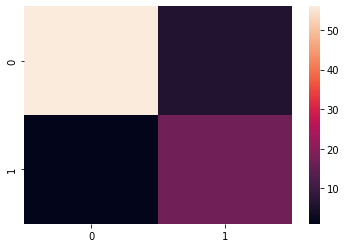

In [15]:
cf=confusion_matrix(ytest,ypred)
sns.heatmap(cf)
print(cf)

<AxesSubplot:>

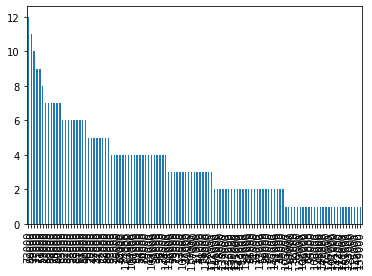

In [16]:
df.EstimatedSalary.value_counts().plot(kind='bar')

In [17]:
x_set= xtrain
y_set= ytrain

In [19]:
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min()-1,
                              stop=x_set[:,0].max()+1,
                              step=0.1),
                              np.arange(start=x_set[:,1].min()-1,
                                        stop=x_set[:,1].max()+1,
                                        step=0.1))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

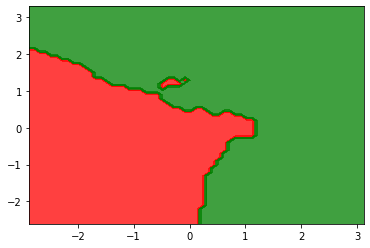

In [20]:
from utils import plot_area_distribution
plot_area_distribution(model,xtrain,ytrain,"logistic")